In [1]:
# Import modules
import requests
import statsmodels.api as sm
import io
import pandas as pd


In [2]:
# Load Dataset
DATA_URL="http://robjhyndman.com/tsdldata/data/nybirths.dat"
fopen = requests.get(DATA_URL).content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount'])
print(ds.head())

   birthcount
0      26.663
1      23.598
2      26.931
3      24.740
4      25.806


In [3]:
# Add time index
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M")
ds['Date']=pd.DataFrame(date)
ds = ds.set_index('Date')

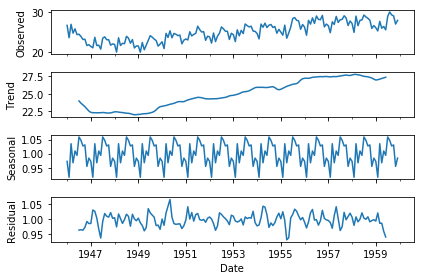

In [4]:
# decompose dataset
res = sm.tsa.seasonal_decompose(ds.birthcount, model="multiplicative")
resplot = res.plot()
